In [179]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [180]:
# Read data from a CSV file into a DataFrame
df = pd.read_csv('sample_data/witcher_network.csv')
df.head()

,Unnamed: 0,Source,Target,Type,Weight,book
0,0,Velerad,Geralt,Undirected,1,1
1,1,Geralt,Foltest,Undirected,5,1
2,2,Foltest,Geralt,Undirected,4,1
3,3,Adda,Geralt,Undirected,1,1
4,4,Geralt,Ostrit,Undirected,4,1


## Pre processing

In [181]:
# remove unuseful columns
df = df.drop(labels='Unnamed: 0', axis=1)
df = df.drop(labels='Type', axis=1)
df = df.rename(columns={'book': 'Book'})

df

,Source,Target,Weight,Book
0,Velerad,Geralt,1,1
1,Geralt,Foltest,5,1
2,Foltest,Geralt,4,1
3,Adda,Geralt,1,1
4,Geralt,Ostrit,4,1
...,...,...,...,...
2595,Lytta,Ciri,2,7
2596,Lytta,Triss,1,7
2597,Triss,Dandelion,1,7
2598,Triss,Yarpen,1,7


In [182]:
# sort in lexicographical order Source and Target
df['Source'], df['Target'] = zip(*df.apply(lambda row: sorted([row['Source'], row['Target']]), axis=1))

# groupby: Among rows with same Source, Target and Book select the one with largest weight
df_proc = df.groupby(['Source', 'Target', 'Book']).agg({'Weight': 'max'}).reset_index()

In [183]:
# save dataframe in csv
df_proc.to_csv('df_grouped.csv', index=False)
print(df_proc.shape)
print(df.shape)

(1770, 4)
(2600, 4)


In [184]:
df_proc

,Source,Target,Book,Weight
0,Adalia,Anna,5,1
1,Adalia,Assire,5,2
2,Adalia,Calanthe,5,1
3,Adalia,Francesca,5,1
4,Adalia,Margarita,5,1
...,...,...,...,...
1765,Yarpen,Yennefer,3,1
1766,Yarpen,Yennefer,4,2
1767,Yarpen,Zoltan,7,8
1768,Yennefer,Yurga,2,1


## Graph

In [185]:
# subgraphs for all 7 books

df_book1 = df_proc[df_proc['Book']==1]
df_book2 = df_proc[df_proc['Book']==2]
df_book3 = df_proc[df_proc['Book']==3]
df_book4 = df_proc[df_proc['Book']==4]
df_book5 = df_proc[df_proc['Book']==5]
df_book6 = df_proc[df_proc['Book']==6]
df_book7 = df_proc[df_proc['Book']==7]

In [186]:
# Create a graph from the dataframe
G_1 = nx.from_pandas_edgelist(df_book1, 'Source', 'Target', edge_attr=True)
G_2 = nx.from_pandas_edgelist(df_book2, 'Source', 'Target', edge_attr=True)
G_3 = nx.from_pandas_edgelist(df_book3, 'Source', 'Target', edge_attr=True)
G_4 = nx.from_pandas_edgelist(df_book4, 'Source', 'Target', edge_attr=True)
G_5 = nx.from_pandas_edgelist(df_book5, 'Source', 'Target', edge_attr=True)
G_6 = nx.from_pandas_edgelist(df_book6, 'Source', 'Target', edge_attr=True)
G_7 = nx.from_pandas_edgelist(df_book7, 'Source', 'Target', edge_attr=True)


In [259]:
# Draw the graph
#plt.figure(figsize=(20, 20))
#nx.draw(G_5, with_labels=True)
#plt.show()

In [188]:
# Create a DataFrame for nodes - debug
df_nodes1 = pd.DataFrame(G_1.nodes(), columns=['Nodes'])
df_nodes2 = pd.DataFrame(G_2.nodes(), columns=['Nodes'])
df_nodes3 = pd.DataFrame(G_3.nodes(), columns=['Nodes'])
df_nodes4 = pd.DataFrame(G_4.nodes(), columns=['Nodes'])
df_nodes5 = pd.DataFrame(G_5.nodes(), columns=['Nodes'])
df_nodes6 = pd.DataFrame(G_6.nodes(), columns=['Nodes'])
df_nodes7 = pd.DataFrame(G_7.nodes(), columns=['Nodes'])


print("Nodes of graph G_1:")
print(df_nodes1)

Nodes of graph G_1:
          Nodes
0          Adda
1       Foltest
2        Geralt
3           Aen
4   Filavandrel
..          ...
62       Little
63     Nivellen
64        Roach
65      Vereena
66        Ravix

[67 rows x 1 columns]


In [189]:
# Create a DataFrame for edges - debug
df_edges1 = pd.DataFrame(list(G_1.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges2 = pd.DataFrame(list(G_2.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges3 = pd.DataFrame(list(G_3.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges4 = pd.DataFrame(list(G_4.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges5 = pd.DataFrame(list(G_5.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges6 = pd.DataFrame(list(G_6.edges(data=True)), columns=['Source', 'Target', 'Attributes'])
df_edges7 = pd.DataFrame(list(G_7.edges(data=True)), columns=['Source', 'Target', 'Attributes'])


print("Edges of graph G_1:")
print(df_edges1)


Edges of graph G_1:
       Source   Target                Attributes
0        Adda  Foltest  {'Book': 1, 'Weight': 1}
1        Adda   Geralt  {'Book': 1, 'Weight': 2}
2     Foltest   Geralt  {'Book': 1, 'Weight': 5}
3     Foltest   Ostrit  {'Book': 1, 'Weight': 1}
4     Foltest      Two  {'Book': 1, 'Weight': 1}
..        ...      ...                       ...
172     Field   Torque  {'Book': 1, 'Weight': 1}
173    Torque   Galarr  {'Book': 1, 'Weight': 3}
174    Ostrit  Velerad  {'Book': 1, 'Weight': 1}
175  Nivellen  Vereena  {'Book': 1, 'Weight': 2}
176     Roach  Vereena  {'Book': 1, 'Weight': 2}

[177 rows x 3 columns]


In [190]:
# cvs files needed for Gephi

# Save nodes DataFrame to a CSV file
df_nodes1.to_csv('nodes.csv', index=False)

# Save edges DataFrame to a CSV file
df_edges1.to_csv('edges.csv', index=False)

## Measures

### Degree Centrality

Number of edges connected to a node

In [191]:
degree_1 = nx.degree_centrality(G_1)
degree_2 = nx.degree_centrality(G_2)
degree_3 = nx.degree_centrality(G_3)
degree_4 = nx.degree_centrality(G_4)
degree_5 = nx.degree_centrality(G_5)
degree_6 = nx.degree_centrality(G_6)
degree_7 = nx.degree_centrality(G_7)

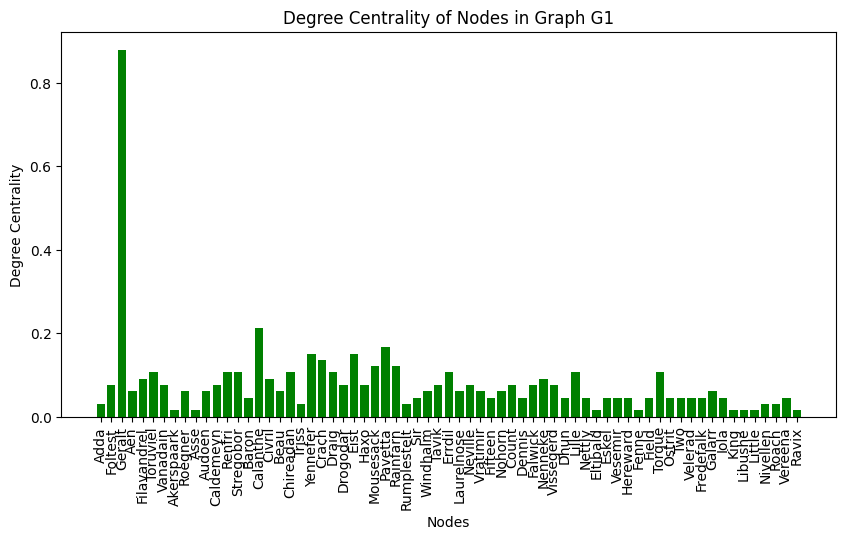

In [192]:
# book1
degree_nodes_1 = degree_1.keys()
degree_centralities_1 = degree_1.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_1, degree_centralities_1, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

In [193]:
# # book2
# degree_nodes_2 = degree_2.keys()
# degree_centralities_2 = degree_2.values()


# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_2, degree_centralities_2, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G2')
# plt.xticks(rotation=90)
# plt.show()

In [194]:
# # book3
# degree_nodes_3 = degree_3.keys()
# degree_centralities_3= degree_3.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_3, degree_centralities_3, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G3')
# plt.xticks(rotation=90)
# plt.show()

In [195]:
# # book4
# degree_nodes_4 = degree_4.keys()
# degree_centralities_4= degree_4.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_4, degree_centralities_4, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G4')
# plt.xticks(rotation=90)
# plt.show()

In [196]:
# # book5
# degree_nodes_5 = degree_5.keys()
# degree_centralities_5= degree_5.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_5, degree_centralities_5, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G5')
# plt.xticks(rotation=90)
# plt.show()

In [197]:
# # book6
# degree_nodes_6 = degree_6.keys()
# degree_centralities_6 = degree_6.values()

# plt.figure(figsize=(10,5))
# plt.bar(degree_nodes_6, degree_centralities_6, color='g')
# plt.xlabel('Nodes')
# plt.ylabel('Degree Centrality')
# plt.title('Degree Centrality of Nodes in Graph G6')
# plt.xticks(rotation=90)
# plt.show()

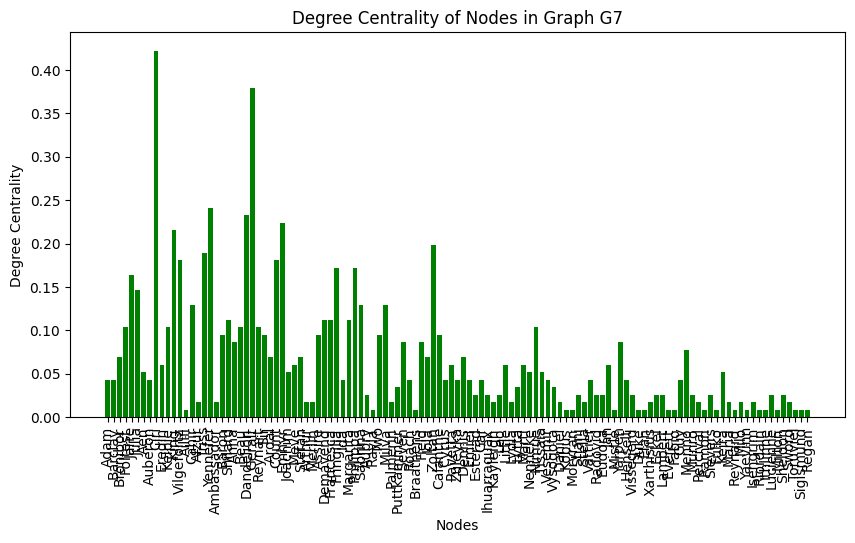

In [198]:
# book7
degree_nodes_7 = degree_7.keys()
degree_centralities_7= degree_7.values()

plt.figure(figsize=(10,5))
plt.bar(degree_nodes_7, degree_centralities_7, color='g')
plt.xlabel('Nodes')
plt.ylabel('Degree Centrality')
plt.title('Degree Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

In [261]:
# Find nodes with degree centrality above a certain threshold: they are the most important nodes (with more edges)
threshold = 0.2

high_degree_nodes_1 = [node for node, deg in degree_1.items() if deg > threshold]
high_degree_nodes_2 = [node for node, deg in degree_2.items() if deg > threshold]
high_degree_nodes_3 = [node for node, deg in degree_3.items() if deg > threshold]
high_degree_nodes_4 = [node for node, deg in degree_4.items() if deg > threshold]
high_degree_nodes_5 = [node for node, deg in degree_5.items() if deg > threshold]
high_degree_nodes_6 = [node for node, deg in degree_6.items() if deg > threshold]
high_degree_nodes_7 = [node for node, deg in degree_7.items() if deg > threshold]

print("Graph 1 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_1)
print("Graph 2 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_2)
print("Graph 3 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_3)
print("Graph 4 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_4)
print("Graph 5 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_5)
print("Graph 6 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_6)
print("Graph 7 - Nodes with degree centrality above ", threshold, ": ", high_degree_nodes_7)


Graph 1 - Nodes with degree centrality above  0.2 :  ['Geralt', 'Calanthe']
Graph 2 - Nodes with degree centrality above  0.2 :  ['Braenn', 'Geralt', 'Dandelion', 'Ciri', 'Yurga']
Graph 3 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Yennefer', 'Dandelion', 'Geralt', 'Calanthe', 'Foltest', 'King', 'Rience', 'Triss']
Graph 4 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Codringher', 'Emhyr', 'Geralt', 'Yennefer', 'Gar', 'Philippa', 'Tissaia', 'Vilgefortz', 'Sabrina']
Graph 5 - Nodes with degree centrality above  0.2 :  ['Assire', 'Francesca', 'Sabrina', 'Yennefer', 'Dandelion', 'Fringilla', 'Geralt', 'Ida', 'Milva', 'Philippa', 'Ciri', 'Cahir', 'Emhyr', 'Zoltan']
Graph 6 - Nodes with degree centrality above  0.2 :  ['Ciri', 'Geralt', 'Baron', 'Emhyr']
Graph 7 - Nodes with degree centrality above  0.2 :  ['Ciri', 'King', 'Yennefer', 'Dandelion', 'Geralt', 'Emhyr']


##### Degree centrality distribution

For each degree value, how many occurencies (nodes)

In [265]:
df_nodes1.shape[0]
degree_1.values()

dict_values([0.030303030303030304, 0.07575757575757576, 0.8787878787878788, 0.06060606060606061, 0.09090909090909091, 0.10606060606060606, 0.07575757575757576, 0.015151515151515152, 0.06060606060606061, 0.015151515151515152, 0.06060606060606061, 0.07575757575757576, 0.10606060606060606, 0.10606060606060606, 0.045454545454545456, 0.21212121212121213, 0.09090909090909091, 0.06060606060606061, 0.10606060606060606, 0.030303030303030304, 0.15151515151515152, 0.13636363636363635, 0.10606060606060606, 0.07575757575757576, 0.15151515151515152, 0.07575757575757576, 0.12121212121212122, 0.16666666666666669, 0.12121212121212122, 0.030303030303030304, 0.045454545454545456, 0.06060606060606061, 0.07575757575757576, 0.10606060606060606, 0.06060606060606061, 0.07575757575757576, 0.06060606060606061, 0.045454545454545456, 0.06060606060606061, 0.07575757575757576, 0.045454545454545456, 0.07575757575757576, 0.09090909090909091, 0.07575757575757576, 0.045454545454545456, 0.10606060606060606, 0.0454545454

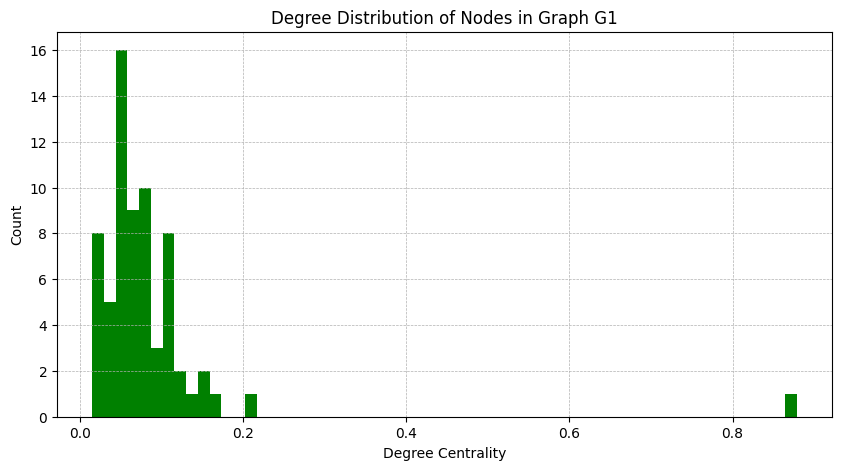

In [200]:
# BOOK 1
degree_values = list(degree_1.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=60, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

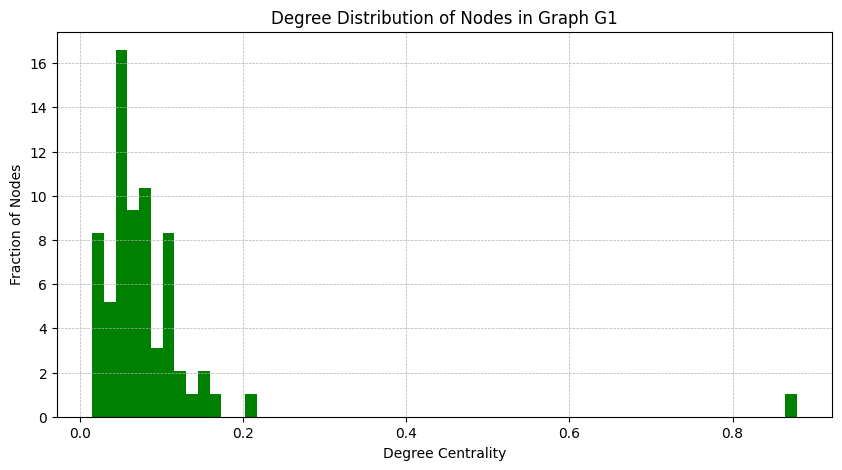

In [269]:
degree_values = list(degree_1.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=60, color='g', density=True, stacked = True)
plt.xlabel('Degree Centrality')
plt.ylabel('Fraction of Nodes')
plt.title('Degree Distribution of Nodes in Graph G1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


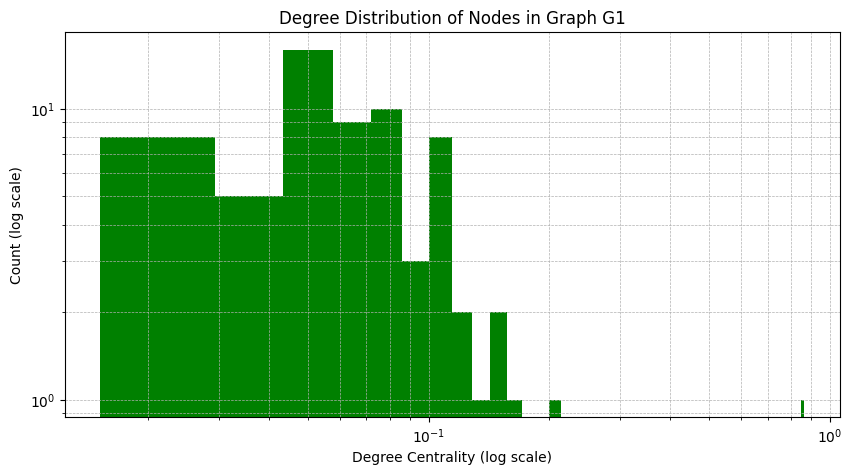

In [201]:
degree_values = list(degree_1.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=60)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=60, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G1')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [202]:
# # BOOK 2
# degree_values = list(degree_2.values())

# plt.figure(figsize=(10,5))
# plt.hist(degree_values, bins=40, color='g')
# plt.xlabel('Degree Centrality')
# plt.ylabel('Count')
# plt.title('Degree Distribution of Nodes in Graph G2')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()

In [203]:
# degree_values = list(degree_2.values())

# # Compute histogram values
# counts, bin_edges = np.histogram(degree_values, bins=40)

# # Plot histogram using log-log scale
# plt.figure(figsize=(10,5))
# plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Degree Centrality (log scale)')
# plt.ylabel('Count (log scale)')
# plt.title('Degree Distribution of Nodes in Graph G2')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()


In [204]:
# # BOOK 3
# degree_values = list(degree_3.values())

# plt.figure(figsize=(10,5))
# plt.hist(degree_values, bins=40, color='g')
# plt.xlabel('Degree Centrality')
# plt.ylabel('Count')
# plt.title('Degree Distribution of Nodes in Graph G3')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()

In [205]:
# degree_values = list(degree_3.values())

# # Compute histogram values
# counts, bin_edges = np.histogram(degree_values, bins=40)

# # Plot histogram using log-log scale
# plt.figure(figsize=(10,5))
# plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Degree Centrality (log scale)')
# plt.ylabel('Count (log scale)')
# plt.title('Degree Distribution of Nodes in Graph G3')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()


In [206]:
# # BOOK 4
# degree_values = list(degree_4.values())

# plt.figure(figsize=(10,5))
# plt.hist(degree_values, bins=40, color='g')
# plt.xlabel('Degree Centrality')
# plt.ylabel('Count')
# plt.title('Degree Distribution of Nodes in Graph G4')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()

In [207]:
# degree_values = list(degree_4.values())

# # Compute histogram values
# counts, bin_edges = np.histogram(degree_values, bins=40)

# # Plot histogram using log-log scale
# plt.figure(figsize=(10,5))
# plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Degree Centrality (log scale)')
# plt.ylabel('Count (log scale)')
# plt.title('Degree Distribution of Nodes in Graph G4')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()

In [208]:
# # BOOK 5
# degree_values = list(degree_5.values())

# plt.figure(figsize=(10,5))
# plt.hist(degree_values, bins=40, color='g')
# plt.xlabel('Degree Centrality')
# plt.ylabel('Count')
# plt.title('Degree Distribution of Nodes in Graph G5')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()


In [209]:
# degree_values = list(degree_5.values())

# # Compute histogram values
# counts, bin_edges = np.histogram(degree_values, bins=40)

# # Plot histogram using log-log scale
# plt.figure(figsize=(10,5))
# plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Degree Centrality (log scale)')
# plt.ylabel('Count (log scale)')
# plt.title('Degree Distribution of Nodes in Graph G5')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()




In [210]:
# # BOOK 6
# degree_values = list(degree_6.values())

# plt.figure(figsize=(10,5))
# plt.hist(degree_values, bins=40, color='g')
# plt.xlabel('Degree Centrality')
# plt.ylabel('Count')
# plt.title('Degree Distribution of Nodes in Graph G6')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()

In [211]:
# degree_values = list(degree_6.values())

# # Compute histogram values
# counts, bin_edges = np.histogram(degree_values, bins=40)

# # Plot histogram using log-log scale
# plt.figure(figsize=(10,5))
# plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
# plt.xscale('log')
# plt.yscale('log')
# plt.xlabel('Degree Centrality (log scale)')
# plt.ylabel('Count (log scale)')
# plt.title('Degree Distribution of Nodes in Graph G6')
# plt.grid(True, which="both", ls="--", linewidth=0.5)
# plt.show()




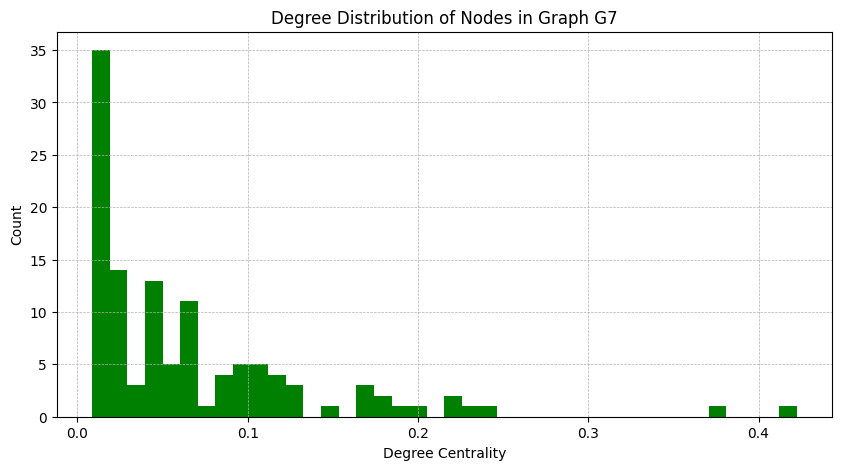

In [212]:
# BOOK 7
degree_values = list(degree_7.values())

plt.figure(figsize=(10,5))
plt.hist(degree_values, bins=40, color='g')
plt.xlabel('Degree Centrality')
plt.ylabel('Count')
plt.title('Degree Distribution of Nodes in Graph G7')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

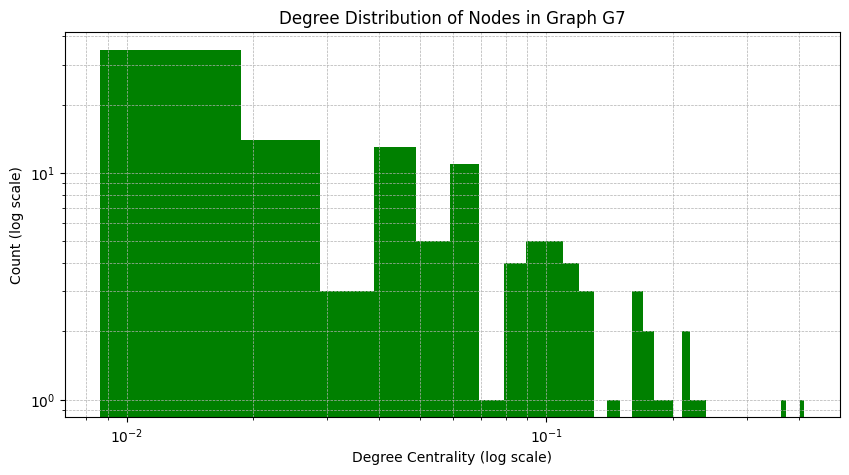

In [213]:
degree_values = list(degree_7.values())

# Compute histogram values
counts, bin_edges = np.histogram(degree_values, bins=40)

# Plot histogram using log-log scale
plt.figure(figsize=(10,5))
plt.hist(bin_edges[:-1], weights=counts, bins=40, color='g', log=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Degree Centrality (log scale)')
plt.ylabel('Count (log scale)')
plt.title('Degree Distribution of Nodes in Graph G7')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()




#### Eigenvector centrality

In [214]:
centrality_1 = nx.eigenvector_centrality(G_1, weight='Weight')
centrality_2 = nx.eigenvector_centrality(G_2, weight='Weight')
centrality_3 = nx.eigenvector_centrality(G_3, weight='Weight')
centrality_4 = nx.eigenvector_centrality(G_4, weight='Weight')
centrality_5 = nx.eigenvector_centrality(G_5, weight='Weight')
centrality_6 = nx.eigenvector_centrality(G_6, weight='Weight')
centrality_7 = nx.eigenvector_centrality(G_7, weight='Weight')

#centrality_1

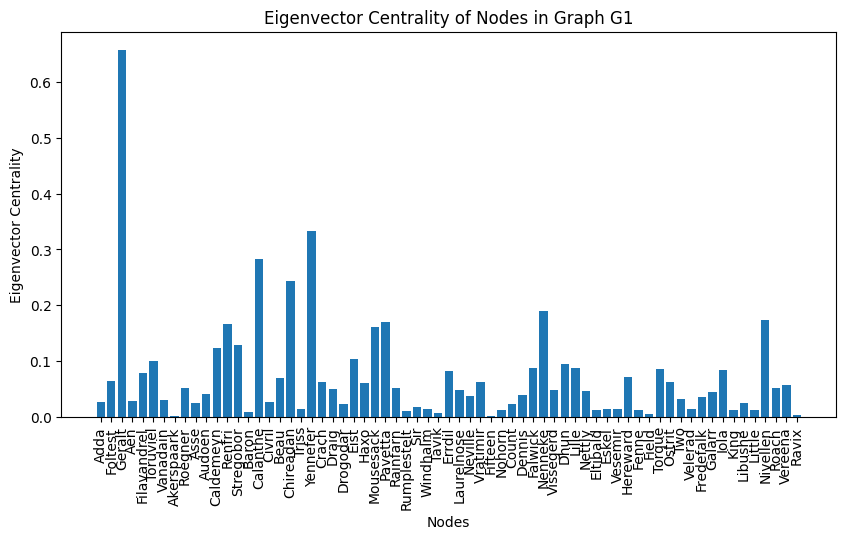

In [215]:
# BOOK 1
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_1.keys()
centralities = centrality_1.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

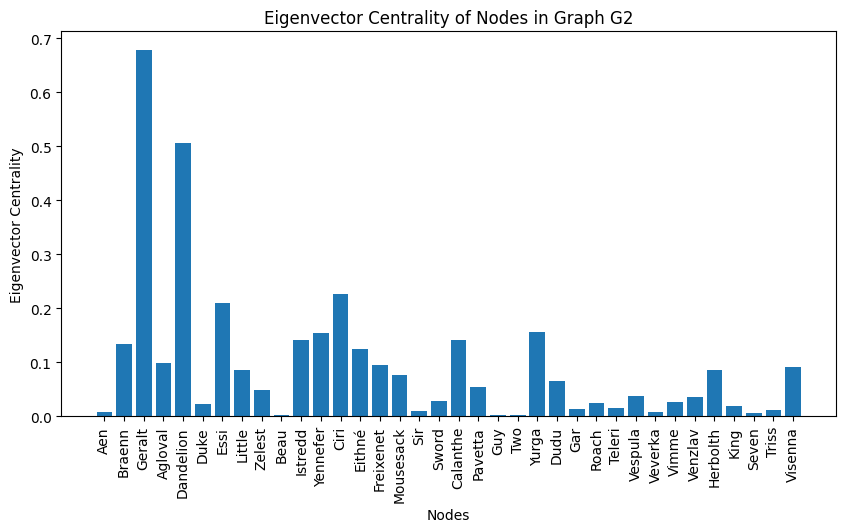

In [216]:
# BOOK 2
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_2.keys()
centralities = centrality_2.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

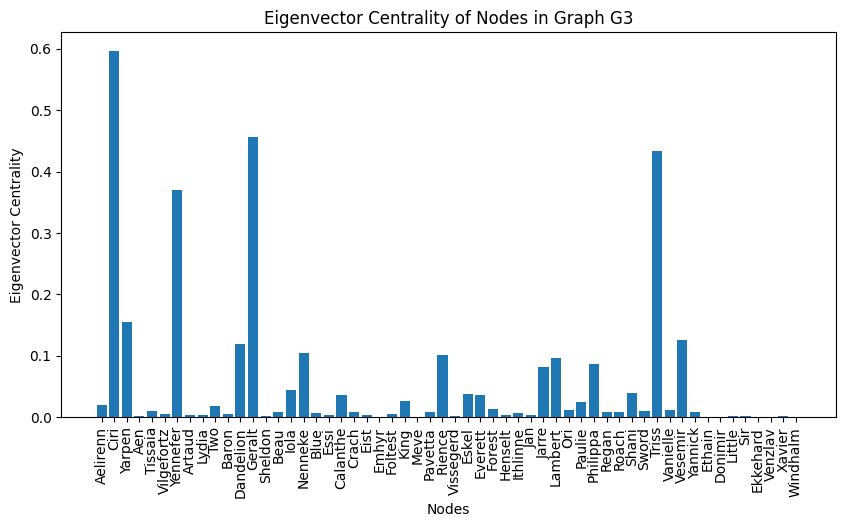

In [217]:
# BOOK 3
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_3.keys()
centralities = centrality_3.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

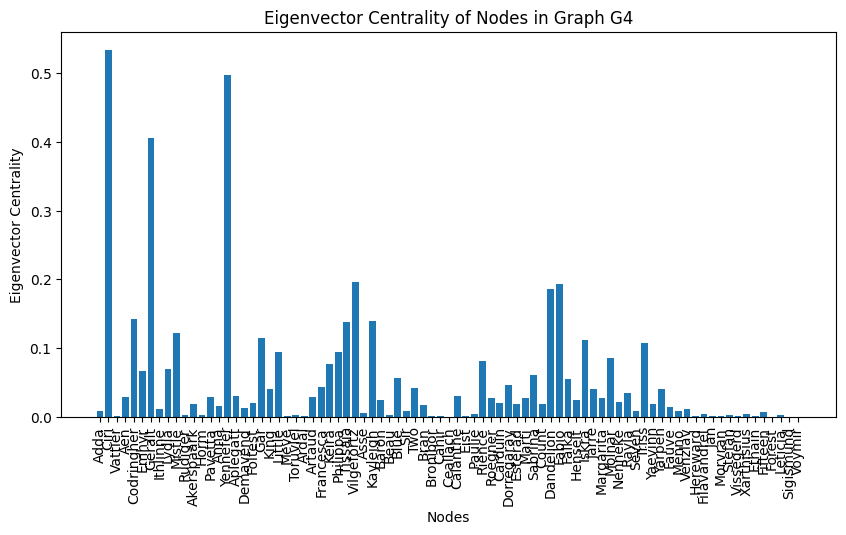

In [218]:
# BOOK 4
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_4.keys()
centralities = centrality_4.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

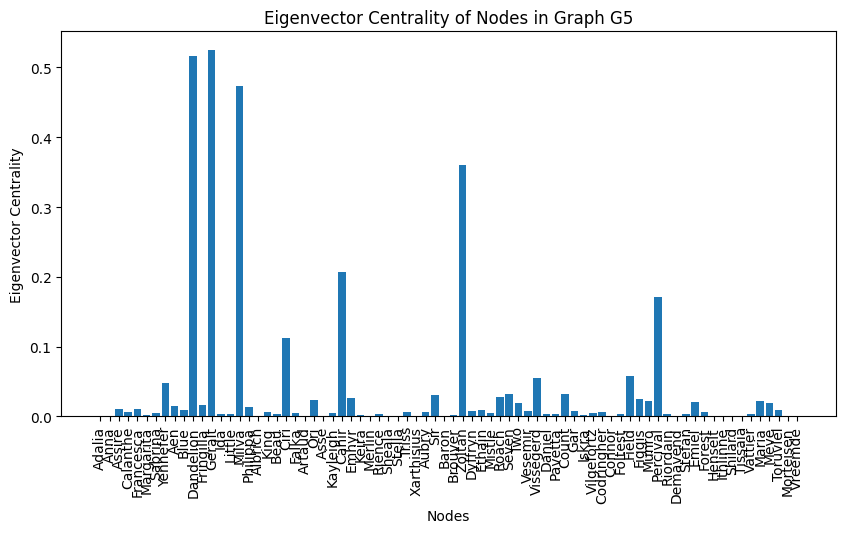

In [219]:
# BOOK 5
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_5.keys()
centralities = centrality_5.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

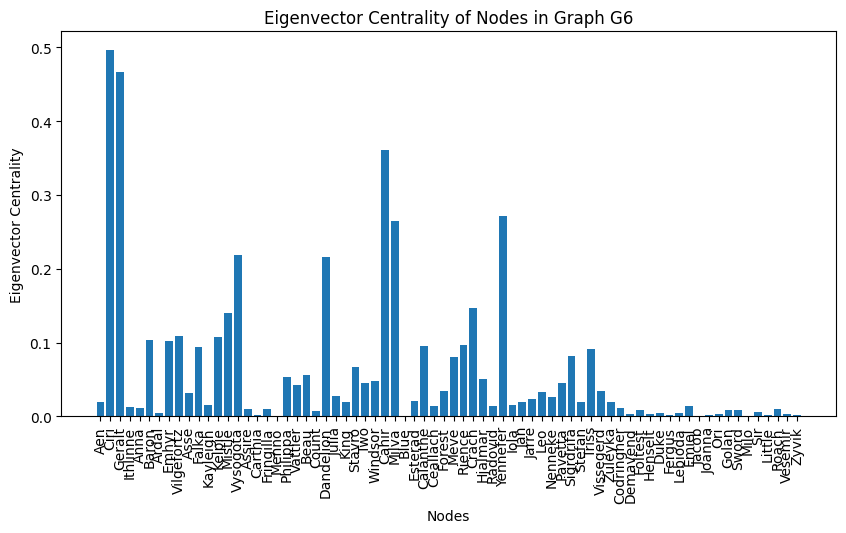

In [220]:
# BOOK 6
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_6.keys()
centralities = centrality_6.values()

plt.figure(figsize=(10,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

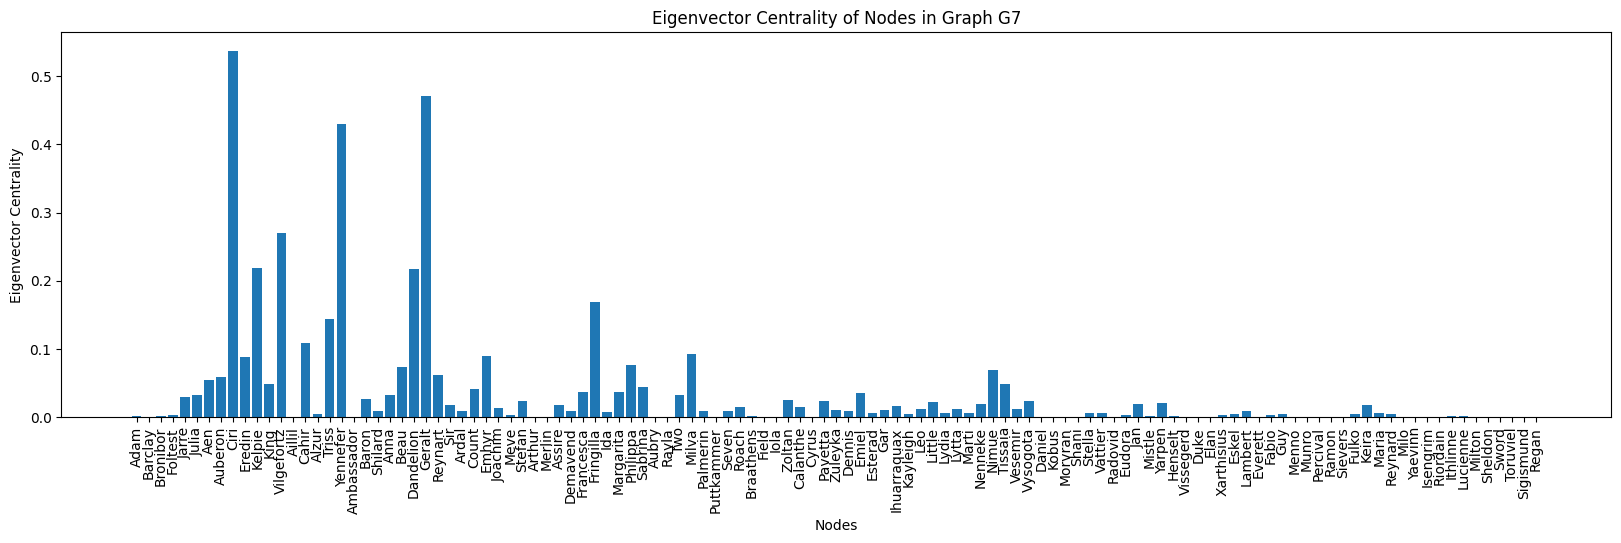

In [221]:
# BOOK 7
# Assuming 'centrality' is your computed eigenvector centrality dictionary
nodes = centrality_7.keys()
centralities = centrality_7.values()

plt.figure(figsize=(20,5))
plt.bar(nodes, centralities)
plt.xlabel('Nodes')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Closeness centrality

In [222]:
closeness_1 = nx.closeness_centrality(G_1)
closeness_2 = nx.closeness_centrality(G_2)
closeness_3 = nx.closeness_centrality(G_3)
closeness_4 = nx.closeness_centrality(G_4)
closeness_5 = nx.closeness_centrality(G_5)
closeness_6 = nx.closeness_centrality(G_6)
closeness_7 = nx.closeness_centrality(G_7)

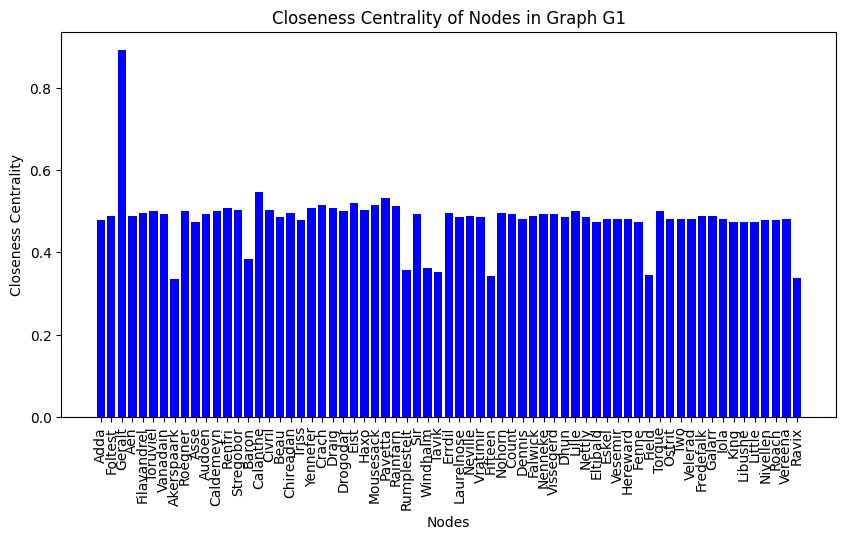

In [223]:
# BOOK 1
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_1.keys()
closeness_centralities = closeness_1.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

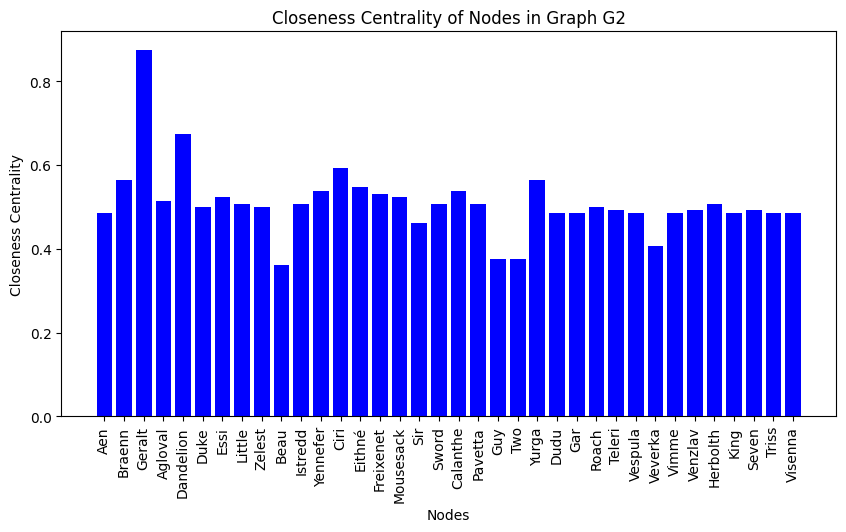

In [224]:
# BOOK 2
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_2.keys()
closeness_centralities = closeness_2.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

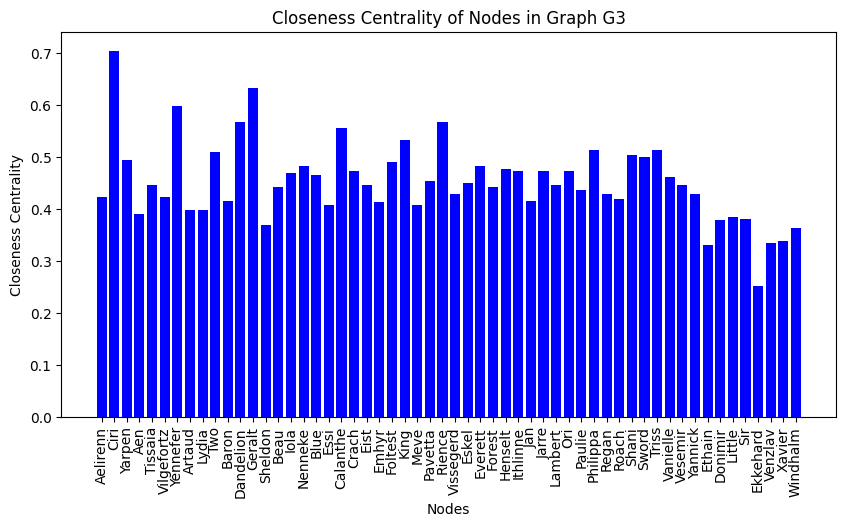

In [225]:
# BOOK 3
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_3.keys()
closeness_centralities = closeness_3.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

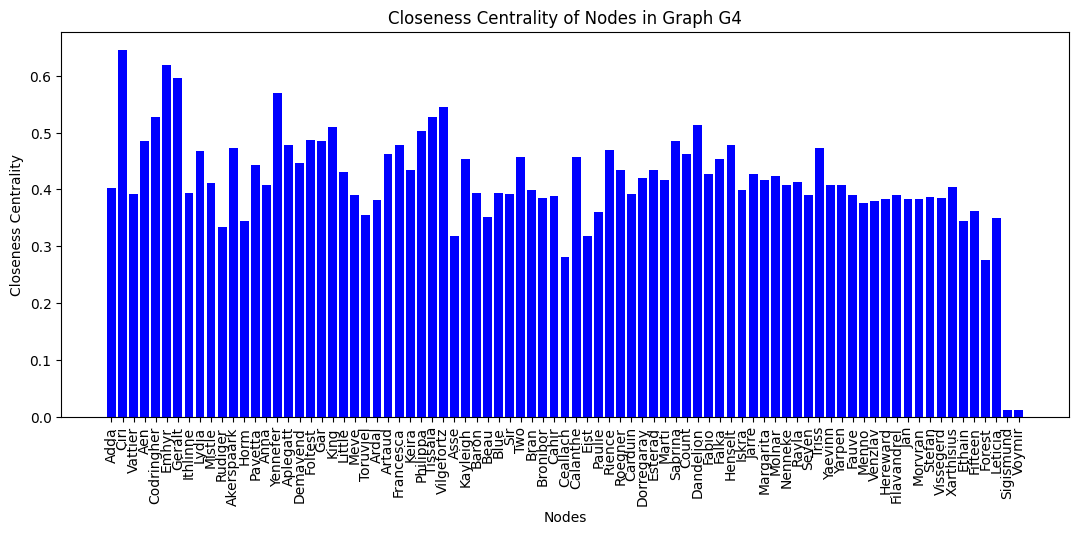

In [226]:
# BOOK 4
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_4.keys()
closeness_centralities = closeness_4.values()

plt.figure(figsize=(13,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

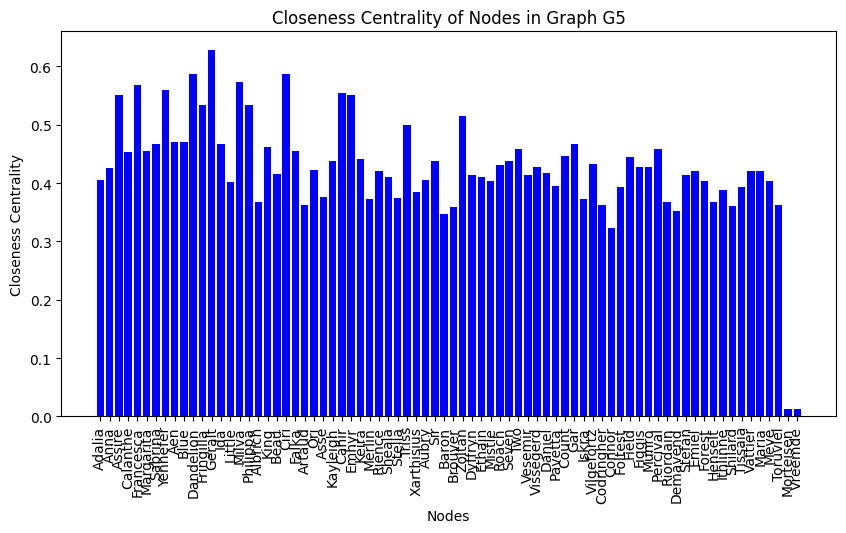

In [227]:
# BOOK 5
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_5.keys()
closeness_centralities = closeness_5.values()

plt.figure(figsize=(10,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

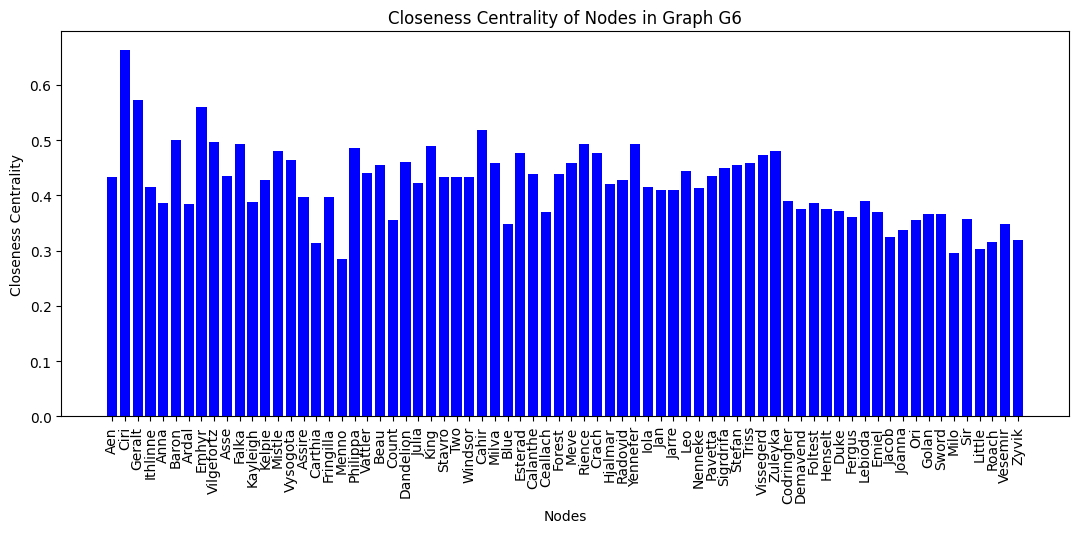

In [228]:
# BOOK 6
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_6.keys()
closeness_centralities = closeness_6.values()

plt.figure(figsize=(13,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

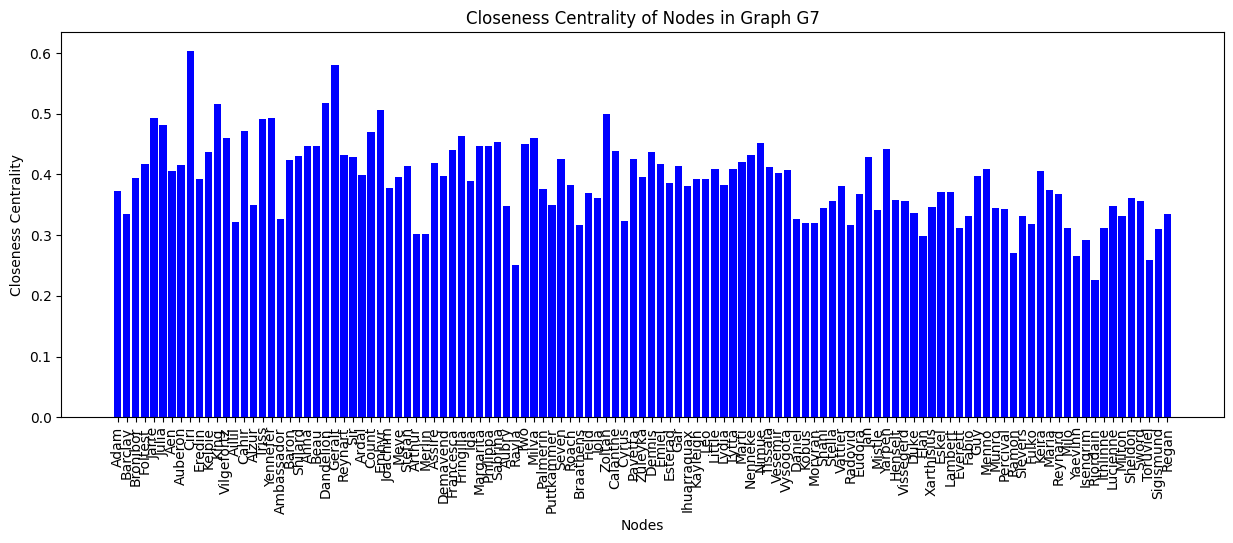

In [229]:
# BOOK 7
# Assuming 'closeness' is your computed closeness centrality dictionary
closeness_nodes = closeness_7.keys()
closeness_centralities = closeness_7.values()

plt.figure(figsize=(15,5))
plt.bar(closeness_nodes, closeness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Betweenness centrality

In [230]:
betweenness_1 = nx.betweenness_centrality(G_1, normalized=True, weight='Weight')
betweenness_2 = nx.betweenness_centrality(G_2, normalized=True, weight='Weight')
betweenness_3 = nx.betweenness_centrality(G_3, normalized=True, weight='Weight')
betweenness_4 = nx.betweenness_centrality(G_4, normalized=True, weight='Weight')
betweenness_5 = nx.betweenness_centrality(G_5, normalized=True, weight='Weight')
betweenness_6 = nx.betweenness_centrality(G_6, normalized=True, weight='Weight')
betweenness_7 = nx.betweenness_centrality(G_7, normalized=True, weight='Weight')


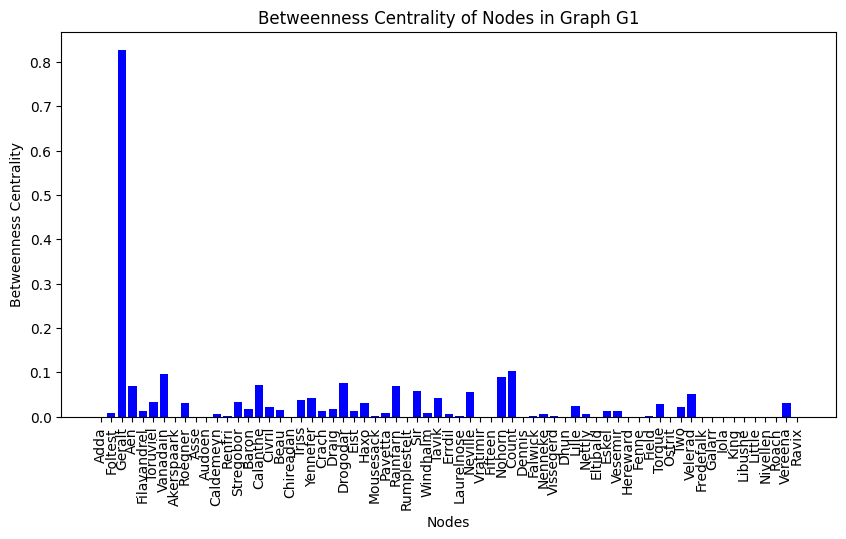

In [231]:
# BOOK 1
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_1.keys()
betweenness_centralities = betweenness_1.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

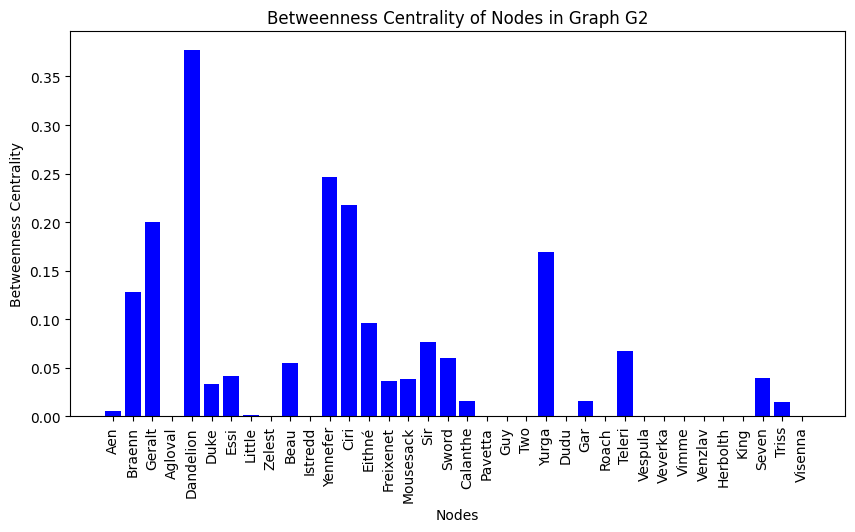

In [232]:
# BOOK 2
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_2.keys()
betweenness_centralities = betweenness_2.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

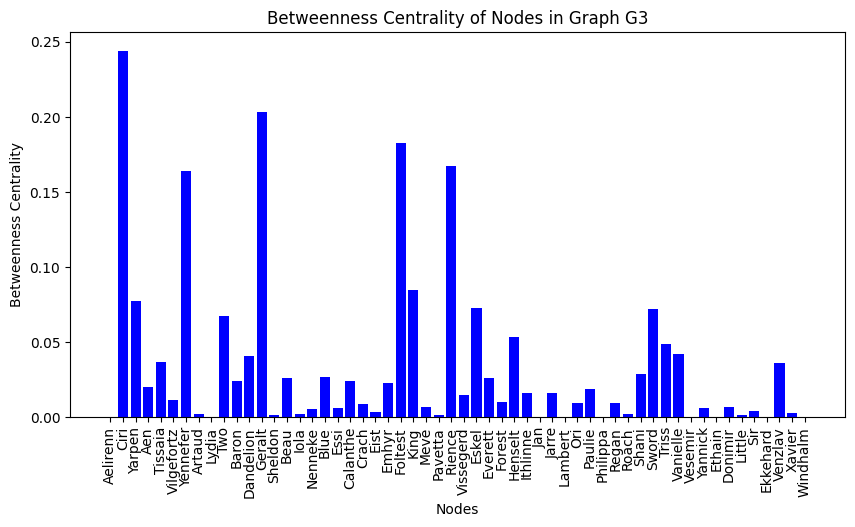

In [233]:
# BOOK 3
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_3.keys()
betweenness_centralities = betweenness_3.values()

plt.figure(figsize=(10,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

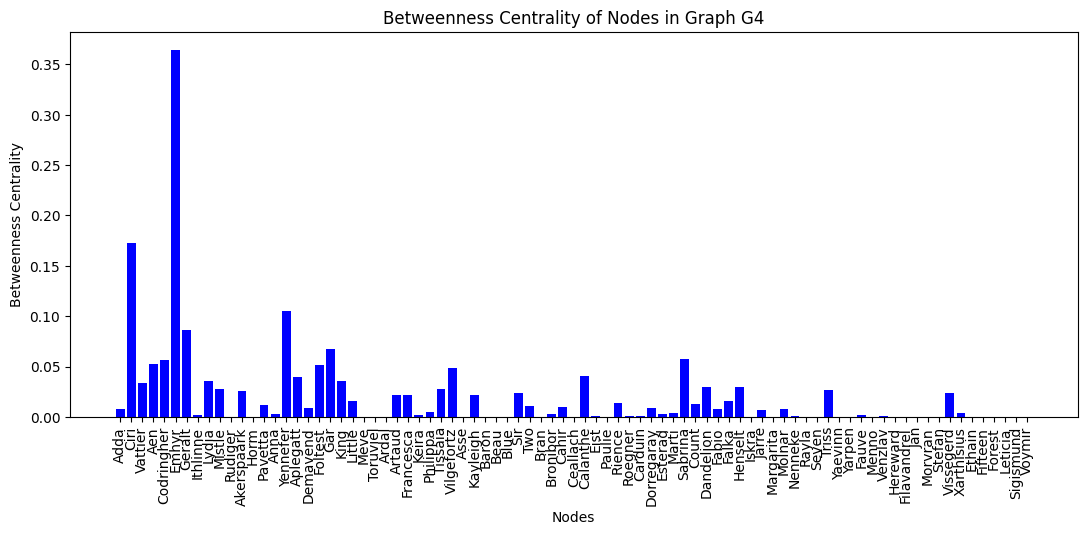

In [234]:
# BOOK 4
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_4.keys()
betweenness_centralities = betweenness_4.values()

plt.figure(figsize=(13,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

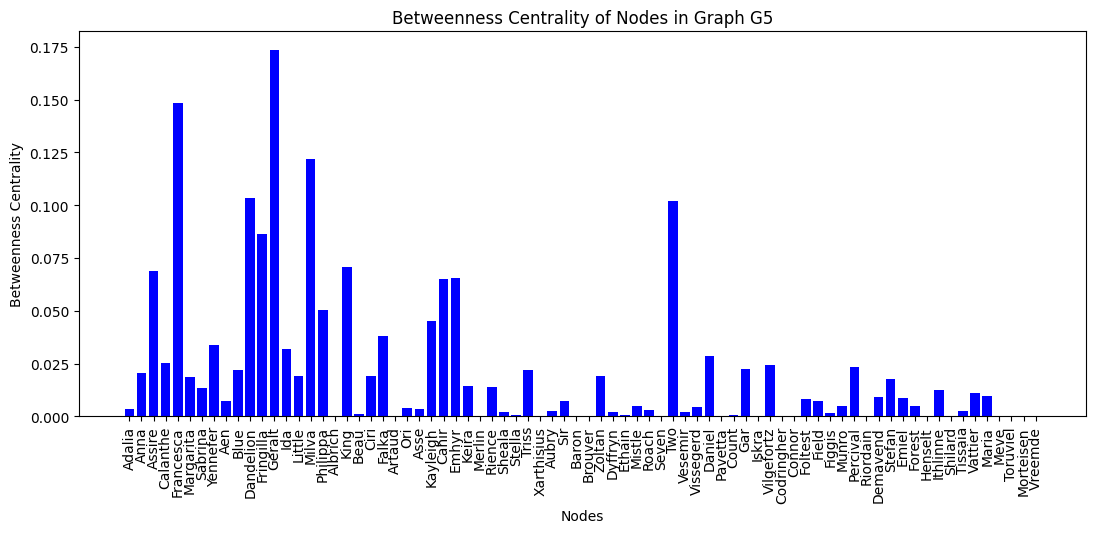

In [235]:
# BOOK 5
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_5.keys()
betweenness_centralities = betweenness_5.values()

plt.figure(figsize=(13,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

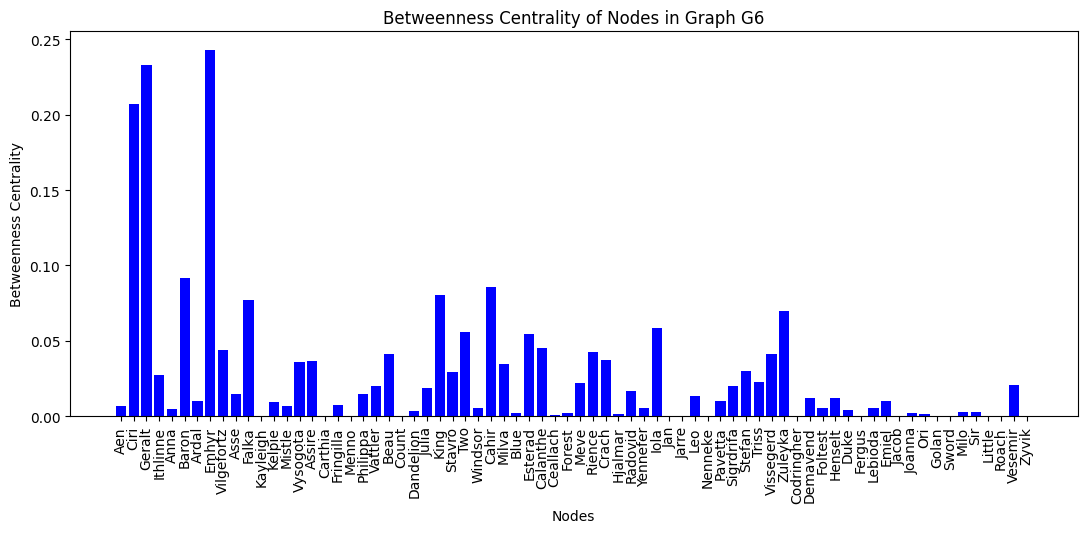

In [236]:
# BOOK 6
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_6.keys()
betweenness_centralities = betweenness_6.values()

plt.figure(figsize=(13,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

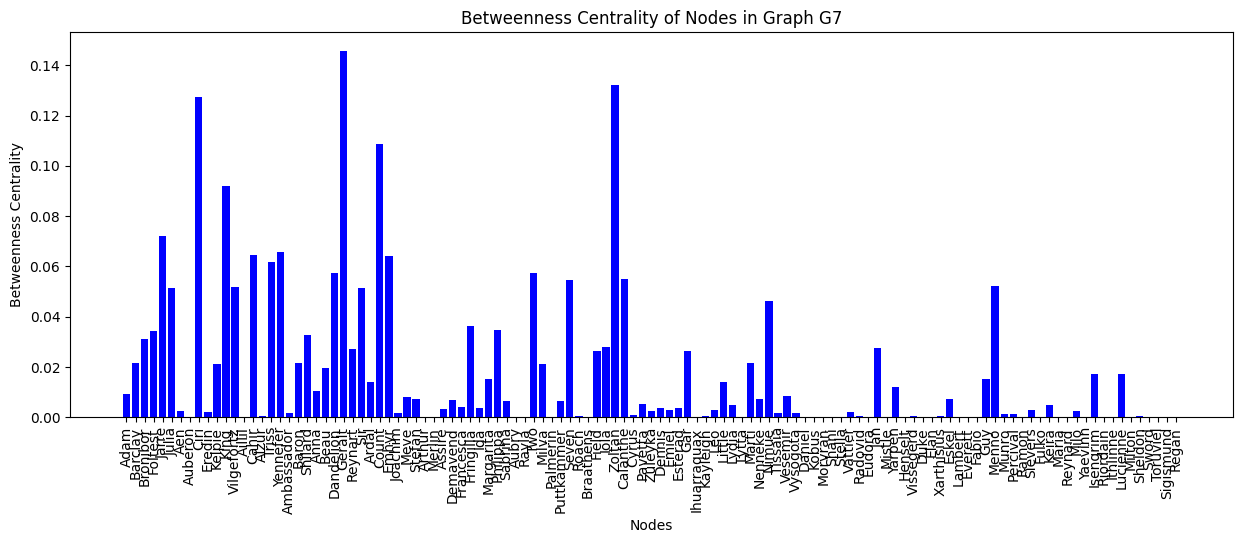

In [237]:
# BOOK 7
# Assuming 'betweenness' is your computed betweenness centrality dictionary
betweenness_nodes = betweenness_7.keys()
betweenness_centralities = betweenness_7.values()

plt.figure(figsize=(15,5))
plt.bar(betweenness_nodes, betweenness_centralities, color='b')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Betweenness Centrality of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Cliques

In [238]:
# BOOK 1
cliques = list(nx.find_cliques(G_1))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Field', 'Filavandrel', 'Torque', 'Lille']
Clique 2: ['Geralt', 'Little']
Clique 3: ['Geralt', 'Dhun', 'Nettly', 'Lille']
Clique 4: ['Geralt', 'Calanthe', 'Pavetta', 'Roegner']
Clique 5: ['Geralt', 'Calanthe', 'Pavetta', 'Mousesack', 'Rainfarn', 'Eist', 'Crach', 'Draig']
Clique 6: ['Geralt', 'Calanthe', 'Pavetta', 'Mousesack', 'Haxo']
Clique 7: ['Geralt', 'Calanthe', 'Drogodar', 'Eist', 'Crach']
Clique 8: ['Geralt', 'Calanthe', 'Sir']
Clique 9: ['Geralt', 'Renfri', 'Stregobor', 'Audoen', 'Caldemeyn']
Clique 10: ['Geralt', 'Renfri', 'Stregobor', 'Fredefalk']
Clique 11: ['Geralt', 'Renfri', 'Civril']
Clique 12: ['Geralt', 'Civril', 'Nohorn']
Clique 13: ['Geralt', 'King']
Clique 14: ['Geralt', 'Iola', 'Yennefer', 'Nenneke']
Clique 15: ['Geralt', 'Asse']
Clique 16: ['Geralt', 'Triss', 'Beau']
Clique 17: ['Geralt', 'Torque', 'Toruviel', 'Galarr', 'Vanadain']
Clique 18: ['Geralt', 'Torque', 'Toruviel', 'Filavandrel', 'Lille']
Clique 19: ['Geralt', 'Errdil', 'Eskel', 'Vesemir']
Cli

In [239]:
# BOOK 2
cliques = list(nx.find_cliques(G_2))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Veverka', 'Dandelion']
Clique 2: ['Two', 'Ciri']
Clique 3: ['Beau', 'Yennefer', 'Istredd']
Clique 4: ['Geralt', 'Pavetta', 'Ciri', 'Calanthe']
Clique 5: ['Geralt', 'Venzlav', 'Eithné', 'Freixenet']
Clique 6: ['Geralt', 'Dandelion', 'Vespula']
Clique 7: ['Geralt', 'Dandelion', 'Calanthe', 'Ciri']
Clique 8: ['Geralt', 'Dandelion', 'Duke', 'Agloval', 'Zelest']
Clique 9: ['Geralt', 'Dandelion', 'Gar']
Clique 10: ['Geralt', 'Dandelion', 'Vimme']
Clique 11: ['Geralt', 'Dandelion', 'Roach']
Clique 12: ['Geralt', 'Dandelion', 'Ciri', 'Braenn']
Clique 13: ['Geralt', 'Dandelion', 'Sword', 'Little']
Clique 14: ['Geralt', 'Dandelion', 'Sword', 'Braenn']
Clique 15: ['Geralt', 'Dandelion', 'Dudu']
Clique 16: ['Geralt', 'Dandelion', 'Essi', 'Yennefer']
Clique 17: ['Geralt', 'Dandelion', 'Essi', 'Agloval', 'Little']
Clique 18: ['Geralt', 'Dandelion', 'Essi', 'Teleri']
Clique 19: ['Geralt', 'King', 'Yurga']
Clique 20: ['Geralt', 'Visenna', 'Yurga']
Clique 21: ['Geralt', 'Yurga', 'Ciri', 'Mo

In [240]:
# BOOK 3
cliques = list(nx.find_cliques(G_3))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Little', 'Dandelion', 'Shani', 'Rience']
Clique 2: ['Sir', 'Dandelion', 'Rience']
Clique 3: ['Ciri', 'Pavetta', 'Calanthe']
Clique 4: ['Ciri', 'Regan', 'Yannick', 'Yarpen']
Clique 5: ['Ciri', 'Two', 'Triss']
Clique 6: ['Ciri', 'Two', 'Dandelion', 'Shani', 'Rience']
Clique 7: ['Ciri', 'Blue', 'Yennefer', 'Dandelion']
Clique 8: ['Ciri', 'Geralt', 'Beau', 'Iola', 'Nenneke']
Clique 9: ['Ciri', 'Geralt', 'King', 'Dandelion', 'Rience', 'Philippa']
Clique 10: ['Ciri', 'Geralt', 'King', 'Dandelion', 'Rience', 'Calanthe']
Clique 11: ['Ciri', 'Geralt', 'King', 'Triss', 'Philippa']
Clique 12: ['Ciri', 'Geralt', 'King', 'Triss', 'Yarpen']
Clique 13: ['Ciri', 'Geralt', 'King', 'Jarre']
Clique 14: ['Ciri', 'Geralt', 'Forest', 'Triss']
Clique 15: ['Ciri', 'Geralt', 'Forest', 'Jarre']
Clique 16: ['Ciri', 'Geralt', 'Yennefer', 'Vanielle', 'Triss']
Clique 17: ['Ciri', 'Geralt', 'Yennefer', 'Jarre', 'Nenneke']
Clique 18: ['Ciri', 'Geralt', 'Yennefer', 'Nenneke', 'Iola']
Clique 19: ['Ciri', 'G

In [241]:
# BOOK 4
cliques = list(nx.find_cliques(G_4))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Fifteen', 'Yennefer']
Clique 2: ['Sabrina', 'Philippa', 'Carduin', 'Tissaia']
Clique 3: ['Sabrina', 'Philippa', 'Carduin', 'Dorregaray', 'Marti']
Clique 4: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Tissaia', 'Triss', 'Lydia']
Clique 5: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Tissaia', 'Triss', 'Keira']
Clique 6: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Tissaia', 'Emhyr', 'Francesca']
Clique 7: ['Sabrina', 'Philippa', 'Geralt', 'Yennefer', 'Dorregaray', 'Francesca']
Clique 8: ['Sabrina', 'Philippa', 'Geralt', 'Marti', 'Keira']
Clique 9: ['Sabrina', 'Philippa', 'Geralt', 'Marti', 'Francesca', 'Dorregaray']
Clique 10: ['Sabrina', 'Philippa', 'Demavend', 'Emhyr', 'Tissaia']
Clique 11: ['Sabrina', 'Philippa', 'Demavend', 'Emhyr', 'Foltest', 'Henselt']
Clique 12: ['Sabrina', 'Philippa', 'Henselt', 'Yennefer', 'Emhyr']
Clique 13: ['Sabrina', 'Philippa', 'Henselt', 'Marti']
Clique 14: ['Sabrina', 'Ethain', 'Henselt']
Clique 15: ['Sabrina', 'Esterad', 'Geralt', 'Tr

In [242]:
# BOOK 5
cliques = list(nx.find_cliques(G_5))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Little', 'Kayleigh', 'Falka']
Clique 2: ['Little', 'Kayleigh', 'Asse']
Clique 3: ['Little', 'Aen', 'Milva']
Clique 4: ['Falka', 'Ciri', 'Kayleigh', 'Mistle']
Clique 5: ['Falka', 'Ciri', 'Assire', 'Francesca', 'Yennefer', 'Philippa', 'Sabrina']
Clique 6: ['Falka', 'Ciri', 'Assire', 'Francesca', 'Anna']
Clique 7: ['Falka', 'Two', 'Mistle']
Clique 8: ['Sheala', 'Sabrina', 'Assire', 'Margarita', 'Philippa', 'Emhyr', 'Francesca']
Clique 9: ['King', 'Zoltan', 'Dandelion', 'Percival']
Clique 10: ['King', 'Zoltan', 'Brouver']
Clique 11: ['King', 'Assire', 'Triss', 'Francesca']
Clique 12: ['King', 'Assire', 'Albrich']
Clique 13: ['Sabrina', 'Yennefer', 'Assire', 'Philippa', 'Margarita', 'Ciri', 'Francesca', 'Emhyr']
Clique 14: ['Sabrina', 'Yennefer', 'Assire', 'Philippa', 'Margarita', 'Ciri', 'Francesca', 'Ida']
Clique 15: ['Sabrina', 'Yennefer', 'Assire', 'Philippa', 'Keira', 'Emhyr', 'Ciri', 'Fringilla']
Clique 16: ['Sabrina', 'Yennefer', 'Assire', 'Philippa', 'Keira', 'Emhyr', 'C

In [243]:
# BOOK 6
cliques = list(nx.find_cliques(G_6))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Little', 'Stavro']
Clique 2: ['Emiel', 'Geralt', 'Milva']
Clique 3: ['King', 'Blue', 'Esterad']
Clique 4: ['King', 'Radovid']
Clique 5: ['King', 'Philippa', 'Zuleyka']
Clique 6: ['King', 'Baron', 'Geralt']
Clique 7: ['King', 'Emhyr', 'Geralt']
Clique 8: ['King', 'Emhyr', 'Demavend', 'Foltest', 'Henselt']
Clique 9: ['King', 'Emhyr', 'Esterad', 'Zuleyka', 'Lebioda']
Clique 10: ['King', 'Emhyr', 'Esterad', 'Foltest']
Clique 11: ['Menno', 'Assire']
Clique 12: ['Assire', 'Fringilla', 'Philippa']
Clique 13: ['Assire', 'Vattier', 'Carthia']
Clique 14: ['Assire', 'Vattier', 'Emhyr']
Clique 15: ['Sir', 'Ithlinne', 'Vilgefortz']
Clique 16: ['Sir', 'Two']
Clique 17: ['Ciri', 'Falka', 'Calanthe']
Clique 18: ['Ciri', 'Falka', 'Windsor', 'Stavro', 'Baron']
Clique 19: ['Ciri', 'Falka', 'Windsor', 'Leo']
Clique 20: ['Ciri', 'Falka', 'Asse', 'Mistle']
Clique 21: ['Ciri', 'Falka', 'Asse', 'Baron']
Clique 22: ['Ciri', 'Falka', 'Emhyr', 'Mistle']
Clique 23: ['Ciri', 'Falka', 'Emhyr', 'Leo']
Cl

In [244]:
# BOOK 7
cliques = list(nx.find_cliques(G_7))
# Print all cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

Clique 1: ['Puttkammer', 'Field', 'Menno']
Clique 2: ['Puttkammer', 'Seven', 'Baron']
Clique 3: ['Radovid', 'Demavend', 'Philippa']
Clique 4: ['Radovid', 'Demavend', 'Cyrus']
Clique 5: ['Elan', 'Seven']
Clique 6: ['Adam', 'Bronibor', 'Julia', 'Foltest']
Clique 7: ['Adam', 'Bronibor', 'Barclay']
Clique 8: ['Adam', 'Bronibor', 'Jarre']
Clique 9: ['Reynart', 'Geralt', 'Guy']
Clique 10: ['Reynart', 'Geralt', 'Dandelion', 'Two', 'Cahir']
Clique 11: ['Reynart', 'Geralt', 'Dandelion', 'Two', 'Roach']
Clique 12: ['Reynart', 'Geralt', 'Dandelion', 'Beau', 'Cahir', 'Count']
Clique 13: ['Reynart', 'Geralt', 'Dandelion', 'Beau', 'Cahir', 'Milva']
Clique 14: ['Reynart', 'Geralt', 'Dandelion', 'Beau', 'Julia', 'Anna']
Clique 15: ['Reynart', 'Geralt', 'Dandelion', 'Beau', 'Julia', 'Count']
Clique 16: ['Reynart', 'Geralt', 'Dandelion', 'Beau', 'Roach']
Clique 17: ['Reynart', 'Geralt', 'Dandelion', 'Sir', 'Anna', 'Julia']
Clique 18: ['Reynart', 'Geralt', 'Dandelion', 'Sir', 'Cahir', 'Milva']
Clique 19:

#### K core

In [245]:
# Compute the k-core of the graph
k = 3 # replace with your desired k value

k_core_1 = nx.k_core(G_1, k)
k_core_2 = nx.k_core(G_2, k)
k_core_3 = nx.k_core(G_3, k)
k_core_4 = nx.k_core(G_4, k)
k_core_5 = nx.k_core(G_5, k)
k_core_6 = nx.k_core(G_6, k)
k_core_7 = nx.k_core(G_7, k)

# Print the nodes in the k-core
print(f"The nodes in the {k}-core are: {k_core_1.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_2.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_3.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_4.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_5.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_6.nodes()}")
print(f"The nodes in the {k}-core are: {k_core_7.nodes()}")


The nodes in the 3-core are: ['Foltest', 'Geralt', 'Aen', 'Filavandrel', 'Toruviel', 'Vanadain', 'Roegner', 'Audoen', 'Caldemeyn', 'Renfri', 'Stregobor', 'Baron', 'Calanthe', 'Civril', 'Beau', 'Chireadan', 'Yennefer', 'Crach', 'Draig', 'Drogodar', 'Eist', 'Haxo', 'Mousesack', 'Pavetta', 'Rainfarn', 'Windhalm', 'Tavik', 'Errdil', 'Laurelnose', 'Neville', 'Vratimir', 'Fifteen', 'Nohorn', 'Count', 'Dennis', 'Falwick', 'Nenneke', 'Vissegerd', 'Dhun', 'Lille', 'Nettly', 'Eskel', 'Vesemir', 'Hereward', 'Field', 'Torque', 'Ostrit', 'Two', 'Velerad', 'Fredefalk', 'Galarr', 'Iola']
The nodes in the 3-core are: ['Braenn', 'Geralt', 'Agloval', 'Dandelion', 'Duke', 'Essi', 'Little', 'Zelest', 'Istredd', 'Yennefer', 'Ciri', 'Eithné', 'Freixenet', 'Mousesack', 'Sir', 'Sword', 'Calanthe', 'Pavetta', 'Yurga', 'Roach', 'Teleri', 'Venzlav', 'Herbolth', 'Seven']
The nodes in the 3-core are: ['Ciri', 'Yarpen', 'Aen', 'Tissaia', 'Vilgefortz', 'Yennefer', 'Artaud', 'Lydia', 'Two', 'Baron', 'Dandelion', 'Ger

#### Clustering

In [246]:
clustering_coefficient_1 = nx.clustering(G_1)
clustering_coefficient_2 = nx.clustering(G_2)
clustering_coefficient_3 = nx.clustering(G_3)
clustering_coefficient_4 = nx.clustering(G_4)
clustering_coefficient_5 = nx.clustering(G_5)
clustering_coefficient_6 = nx.clustering(G_6)
clustering_coefficient_7 = nx.clustering(G_7)

# Print the clustering coefficient for each node
#for node, coeff in clustering_coefficient.items():
#    print(f"Node {node} has clustering coefficient {coeff}")


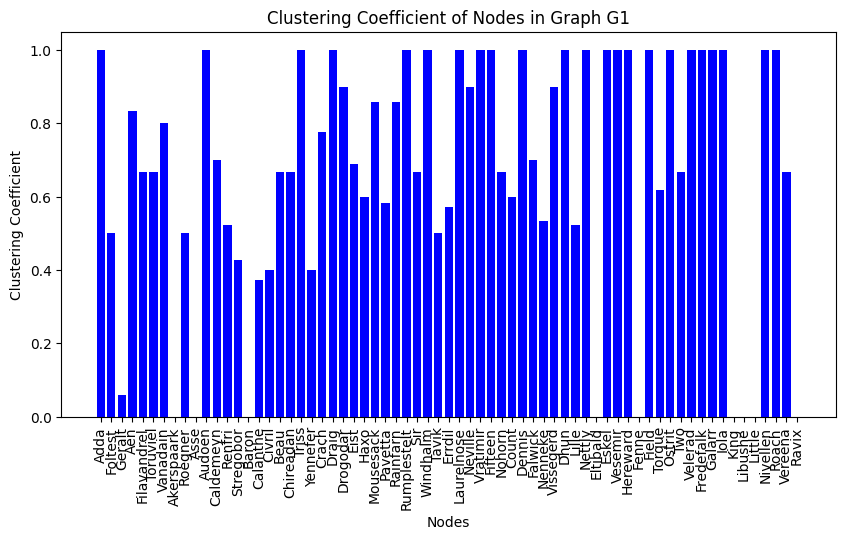

In [247]:
# BOOK 1
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_1.keys()
clustering_values = clustering_coefficient_1.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G1')
plt.xticks(rotation=90)
plt.show()

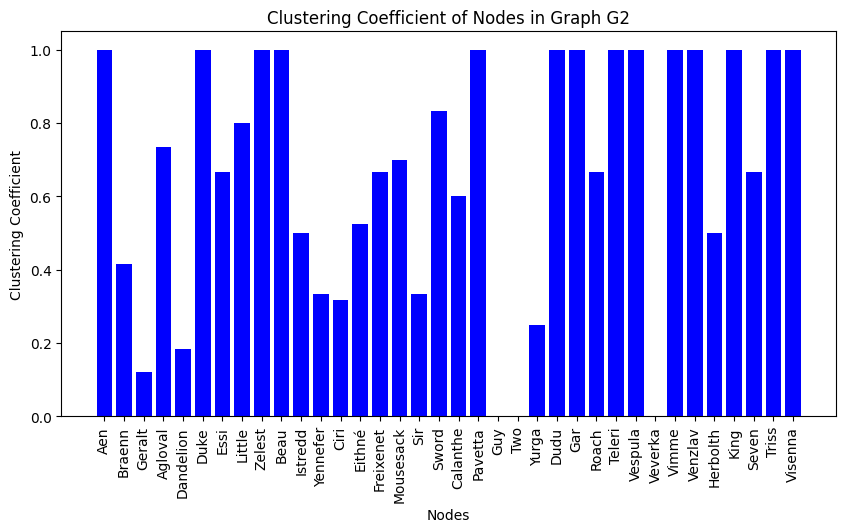

In [248]:
# BOOK 2
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_2.keys()
clustering_values = clustering_coefficient_2.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G2')
plt.xticks(rotation=90)
plt.show()

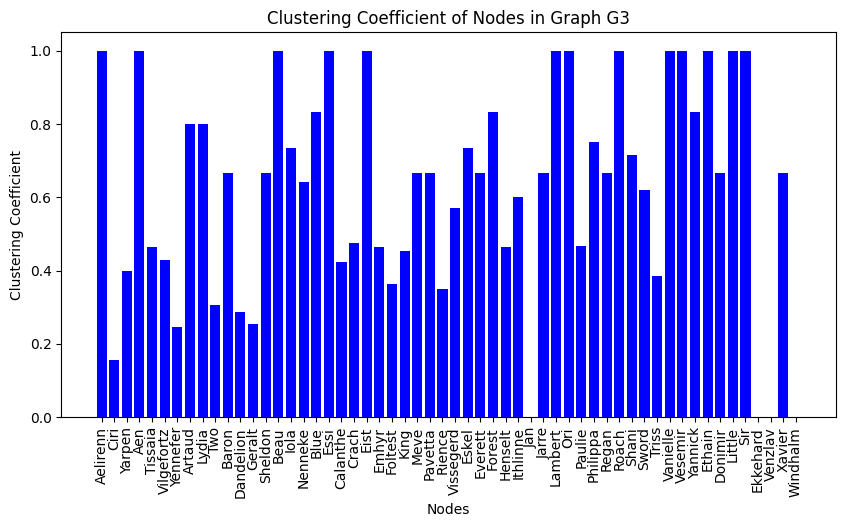

In [249]:
# BOOK 3
# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_3.keys()
clustering_values = clustering_coefficient_3.values()

plt.figure(figsize=(10,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G3')
plt.xticks(rotation=90)
plt.show()

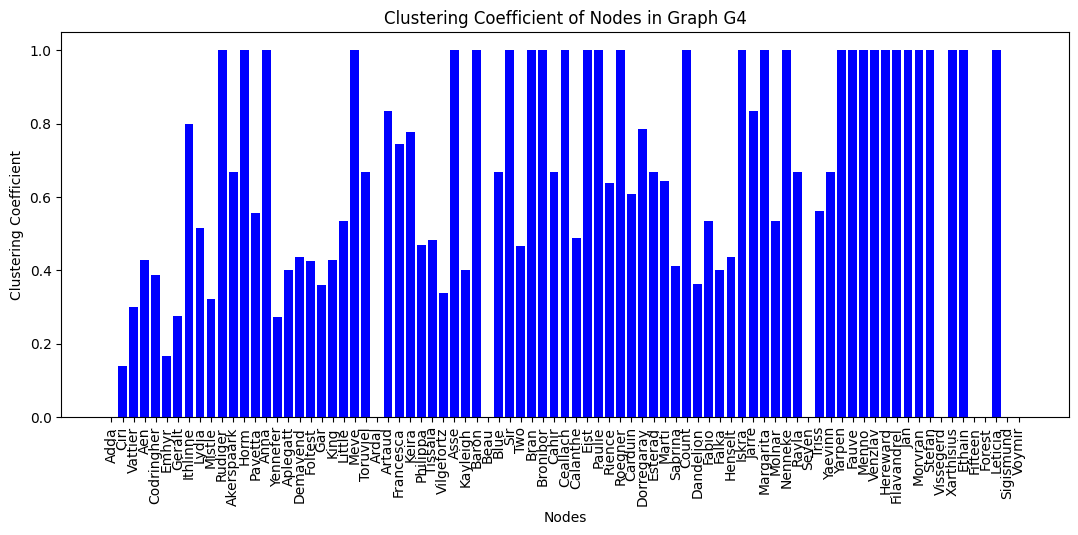

In [250]:
# BOOK 4

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_4.keys()
clustering_values = clustering_coefficient_4.values()

plt.figure(figsize=(13,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G4')
plt.xticks(rotation=90)
plt.show()

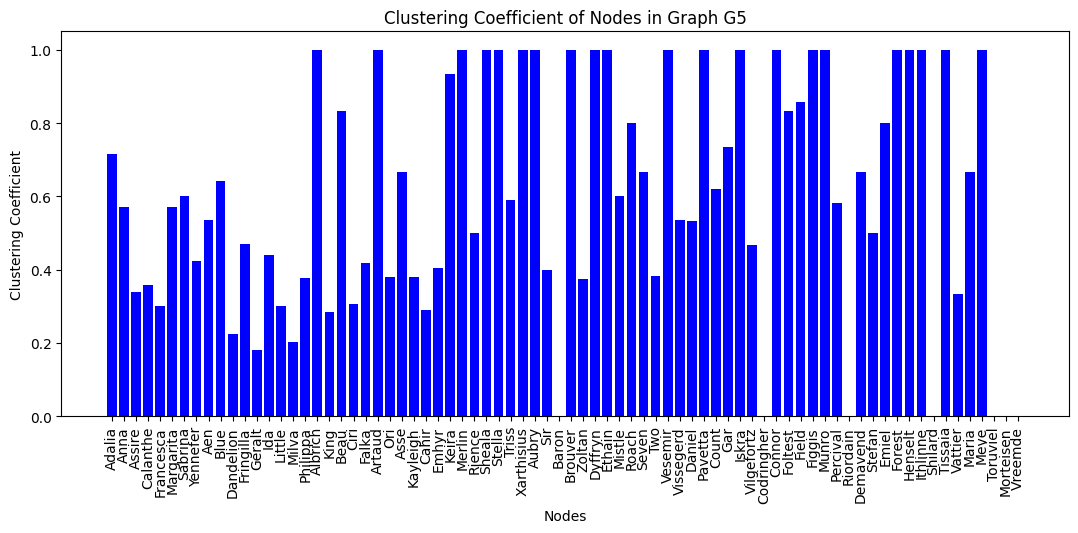

In [251]:
# BOOK 5

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_5.keys()
clustering_values = clustering_coefficient_5.values()

plt.figure(figsize=(13,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G5')
plt.xticks(rotation=90)
plt.show()

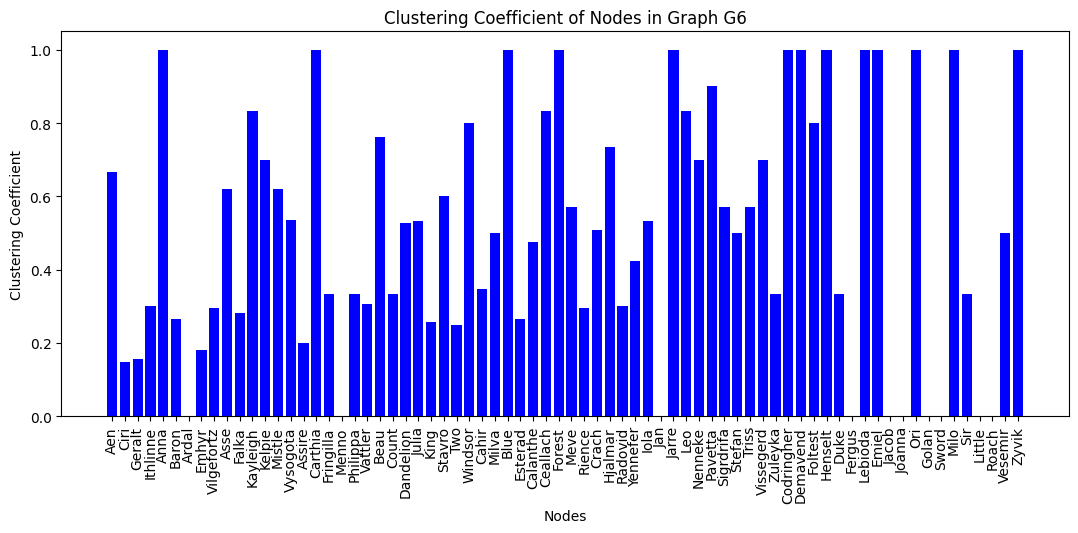

In [252]:
# BOOK 6

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_6.keys()
clustering_values = clustering_coefficient_6.values()

plt.figure(figsize=(13,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G6')
plt.xticks(rotation=90)
plt.show()

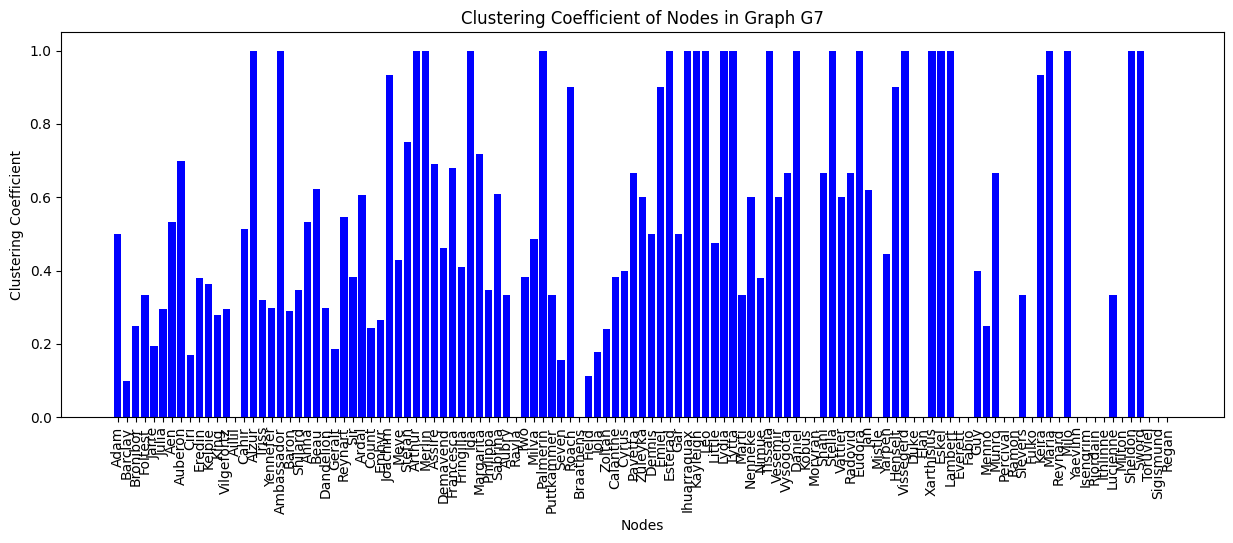

In [253]:
# BOOK 7

# Assuming 'betweenness' is your computed betweenness centrality dictionary
clustering_nodes = clustering_coefficient_7.keys()
clustering_values = clustering_coefficient_7.values()

plt.figure(figsize=(15,5))
plt.bar(clustering_nodes, clustering_values, color='b')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficient of Nodes in Graph G7')
plt.xticks(rotation=90)
plt.show()

#### Structural equivalence

In [254]:
#import sys
#np.set_printoptions(threshold=sys.maxsize) # to print the whole matrix without truncation

# Compute adjacency matrix
A_1 = nx.adjacency_matrix(G_1)
A_2 = nx.adjacency_matrix(G_2)
A_3 = nx.adjacency_matrix(G_3)
A_4 = nx.adjacency_matrix(G_4)
A_5 = nx.adjacency_matrix(G_5)
A_6 = nx.adjacency_matrix(G_6)
A_7 = nx.adjacency_matrix(G_7)


def structural_equiv(A):
  return np.inner(A.toarray(), A.toarray()) / (np.linalg.norm(A.toarray(), axis=1) * np.linalg.norm(A.toarray(), axis=1)[:, None])

# Compute structural equivalence (cosine similarity of adjacency matrix rows)
structural_equivalence_1 = structural_equiv(A_1)
structural_equivalence_2 = structural_equiv(A_2)
structural_equivalence_3 = structural_equiv(A_3)
structural_equivalence_4 = structural_equiv(A_4)
structural_equivalence_5 = structural_equiv(A_5)
structural_equivalence_6 = structural_equiv(A_6)
structural_equivalence_7 = structural_equiv(A_7)


print(structural_equivalence_7)
# put a threshold on values to select only couples of nodes with a consistent number of common neighbours

[[1.         0.2        0.63245553 ... 0.         0.         0.        ]
 [0.2        1.         0.15811388 ... 0.         0.         0.        ]
 [0.63245553 0.15811388 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


#### Assortative mixing by degree

In [255]:
# A positive value indicates a correlation between nodes of similar degree (high with high, low with low)
# while a negative value indicates a correlation between nodes of different degree
r_1 = nx.degree_assortativity_coefficient(G_1)

print("Degree assortativity coefficient:", r_1)
# Negative result -> high degree nodes interact more with low degree nodes
# a star-like graph (see picture on the slide)

Degree assortativity coefficient: -0.2505522119404024


In [256]:
r_1 = nx.degree_assortativity_coefficient(G_1)
r_2 = nx.degree_assortativity_coefficient(G_2)
r_3 = nx.degree_assortativity_coefficient(G_3)
r_4 = nx.degree_assortativity_coefficient(G_4)
r_5 = nx.degree_assortativity_coefficient(G_5)
r_6 = nx.degree_assortativity_coefficient(G_6)
r_7 = nx.degree_assortativity_coefficient(G_7)

print("Degree assortativity coefficient book 1:", r_1)
print("Degree assortativity coefficient book 2:", r_2)
print("Degree assortativity coefficient book 3:", r_3)
print("Degree assortativity coefficient book 4:", r_4)
print("Degree assortativity coefficient book 5:", r_5)
print("Degree assortativity coefficient book 6:", r_6)
print("Degree assortativity coefficient book 7:", r_7)

Degree assortativity coefficient book 1: -0.2505522119404024
Degree assortativity coefficient book 2: -0.3918270416897044
Degree assortativity coefficient book 3: -0.2367110202879257
Degree assortativity coefficient book 4: -0.25321777572121285
Degree assortativity coefficient book 5: -0.24594744728989135
Degree assortativity coefficient book 6: -0.1854984742624426
Degree assortativity coefficient book 7: -0.14474127323748


#### Density

In [257]:
density_1 = nx.density(G_1)
density_2 = nx.density(G_2)
density_3 = nx.density(G_3)
density_4 = nx.density(G_4)
density_5 = nx.density(G_5)
density_6 = nx.density(G_6)
density_7 = nx.density(G_7)

print(density_1)
print(density_2)
print(density_3)
print(density_4)
print(density_5)
print(density_6)
print(density_7)

0.08005427408412483
0.1492063492063492
0.12727272727272726
0.08962679988245666
0.11017543859649123
0.09076682316118936
0.06660772178013558


In [258]:
import cpnet

# Load an algorithm for detecting core-periphery structure in networks
algorithm = cpnet.KM_config()

# Pass your graph object to the algorithm
algorithm.detect(G_1)

# Retrieve the results
c = algorithm.get_pair_id()  # Group ids: nodes having the same integer belong to the same group
x = algorithm.get_coreness()  # Coreness ranging between 0 and 1. A larger value indicates that the node is closer to the core

print(c)
print(x)

# display in modo carino come dataframe (SARA)
# prova a visualizzare i gruppi con diversi colori

{'Adda': 7, 'Foltest': 7, 'Geralt': 0, 'Aen': 0, 'Filavandrel': 0, 'Toruviel': 0, 'Vanadain': 0, 'Akerspaark': 3, 'Roegner': 3, 'Asse': 0, 'Audoen': 1, 'Caldemeyn': 1, 'Renfri': 1, 'Stregobor': 1, 'Baron': 1, 'Calanthe': 3, 'Civril': 1, 'Beau': 2, 'Chireadan': 2, 'Triss': 2, 'Yennefer': 2, 'Crach': 3, 'Draig': 3, 'Drogodar': 3, 'Eist': 3, 'Haxo': 3, 'Mousesack': 3, 'Pavetta': 3, 'Rainfarn': 3, 'Rumplestelt': 4, 'Sir': 4, 'Windhalm': 3, 'Tavik': 1, 'Errdil': 2, 'Laurelnose': 2, 'Neville': 2, 'Vratimir': 2, 'Fifteen': 1, 'Nohorn': 1, 'Count': 5, 'Dennis': 5, 'Falwick': 5, 'Nenneke': 5, 'Vissegerd': 3, 'Dhun': 0, 'Lille': 0, 'Nettly': 0, 'Eltibald': 0, 'Eskel': 6, 'Vesemir': 6, 'Hereward': 5, 'Fenne': 0, 'Field': 0, 'Torque': 0, 'Ostrit': 7, 'Two': 7, 'Velerad': 7, 'Fredefalk': 1, 'Galarr': 0, 'Iola': 5, 'King': 0, 'Libushe': 0, 'Little': 0, 'Nivellen': 8, 'Roach': 8, 'Vereena': 8, 'Ravix': 3}
{'Adda': 0, 'Foltest': 1, 'Geralt': 0, 'Aen': 1, 'Filavandrel': 1, 'Toruviel': 1, 'Vanadain': 1,